# Supervised Learning Technique

This notebook show how Supervised Machine Learning techniques can be used to predict the Loan defaulters

Algorithms used:<br>
Logistic regression <br>
Random Forest <br>
Extreme Gradient Boost <br>

Also I have used SMOTE and Random OverSampler to balance the class.

### Load the data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import sys
import warnings
warnings.filterwarnings("ignore")

# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

In [ ]:
# Mount Google Drive
from google.colab import drive

drive.mount('/content/drive')
path = '/content/drive/MyDrive/home-credit-default-risk/cleandata.csv'
application_train = pd.read_csv(path)

Mounted at /content/drive


## Modeling

### Partitioning

In [ ]:
#Determine the number of fraud and valid transactions in the dataset

Fraud = application_train[application_train['TARGET']==1]

Valid = application_train[application_train['TARGET']==0]

outlier_fraction = len(Fraud)/float(len(Valid))

print('outlier_fraction for the whole dataset:')
print(outlier_fraction)

print("Fraud Cases : {}".format(len(Fraud)))

print("Valid Cases : {}".format(len(Valid)))

outlier_fraction for the whole dataset:
0.08781828601345662
Fraud Cases : 24825
Valid Cases : 282686


In [ ]:
from sklearn.model_selection import train_test_split

#Create independent and Dependent Features
columns = application_train.columns.tolist()
# Filter the columns to remove data we do not want
columns = [c for c in columns if c not in ["TARGET"]]
# Store the variable we are predicting
target = "TARGET"
# Define a random state
state = np.random.RandomState(42)
X = application_train[columns]
y = application_train[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(246008, 245) (246008,)
(61503, 245) (61503,)


### More Feature Selection

using RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

In [ ]:
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100, random_state=state))
sel.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(random_state=RandomState(MT19937) at 0x7F03352FE140))

In [ ]:
sel.get_support()

array([ True, False, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False, False, False,
       False, False, False,  True, False,  True,  True, False, False,
       False, False, False, False,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True, False, False,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True, False,
       False, False, False,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True, False, False, False, False,  True,
        True,  True, False,  True,  True, False,  True,  True,  True,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [ ]:
selected_feat= X_train.columns[(sel.get_support())].tolist()
len(selected_feat)

59

In [ ]:
print(selected_feat)

['SK_ID_CURR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ENTRANCES_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAREA_MEDI', 'TOTALAREA_MODE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_

In [ ]:
app_X_train = X_train.copy() #Taking a copy before dropping
app_X_test = X_test.copy()

In [ ]:
X_train = X_train[selected_feat]
X_test = X_test[selected_feat]

In [ ]:
print (X_train.shape, X_test.shape)

(246008, 59) (61503, 59)


------------------------------

## Logistic Regression

In [ ]:

from sklearn.linear_model import LogisticRegression

logistic_regressor = LogisticRegression(C = 2)

In [ ]:
logistic_regressor.fit(X_train,y_train)


LogisticRegression(C=2)

In [ ]:
y_pred = logistic_regressor.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,accuracy_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix

n_errors = (y_pred != y_test).sum()
# Run Classification Metrics
print("{}: {}".format("Logistic Regression errors",n_errors))
print("Accuracy Score :")
print(accuracy_score(y_test,y_pred))
print("Confusion matrix :")
print(confusion_matrix(y_test, y_pred))
print("Classification Report :")
print(classification_report(y_test,y_pred))
print("ROC AUC score is: ",roc_auc_score(y_test,y_pred))

Logistic Regression errors: 4996
Accuracy Score :
0.9187681901695852
Confusion matrix :
[[56507     0]
 [ 4996     0]]
Classification Report :
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56507
           1       0.00      0.00      0.00      4996

    accuracy                           0.92     61503
   macro avg       0.46      0.50      0.48     61503
weighted avg       0.84      0.92      0.88     61503

ROC AUC score is:  0.5


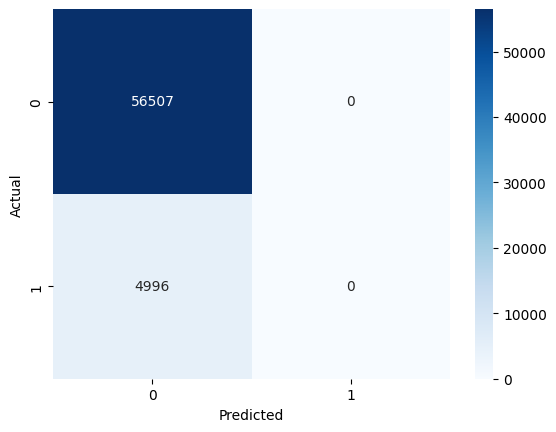

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Definisikan confusion matrix
cm = np.array([[56507, 0],
               [4996, 0]])

# Membuat heat map dari confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

# Mengatur label sumbu x dan y
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Menampilkan heat map
plt.show()

## Random Forest - Bagging ensemble of Decision trees

In [ ]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators = 100, random_state = state, verbose = 1, n_jobs = -1)

In [ ]:
random_forest.fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.5min finished


RandomForestClassifier(n_jobs=-1,
                       random_state=RandomState(MT19937) at 0x7F03352FE140,
                       verbose=1)

In [ ]:
y_pred = random_forest.predict(X_test)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.9s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    1.9s finished


In [ ]:
n_errors = (y_pred != y_test).sum()
# Run Classification Metrics
print("{}: {}".format("Random Forest errors",n_errors))
print("Accuracy Score :")
print(accuracy_score(y_test,y_pred))
print("Confusion matrix :")
print(confusion_matrix(y_test, y_pred))
print("Classification Report :")
print(classification_report(y_test,y_pred))
print("ROC AUC score is: ",roc_auc_score(y_test,y_pred))

Random Forest errors: 4989
Accuracy Score :
0.9188820057558168
Confusion matrix :
[[56499     8]
 [ 4981    15]]
Classification Report :
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56507
           1       0.65      0.00      0.01      4996

    accuracy                           0.92     61503
   macro avg       0.79      0.50      0.48     61503
weighted avg       0.90      0.92      0.88     61503

ROC AUC score is:  0.501430413270748


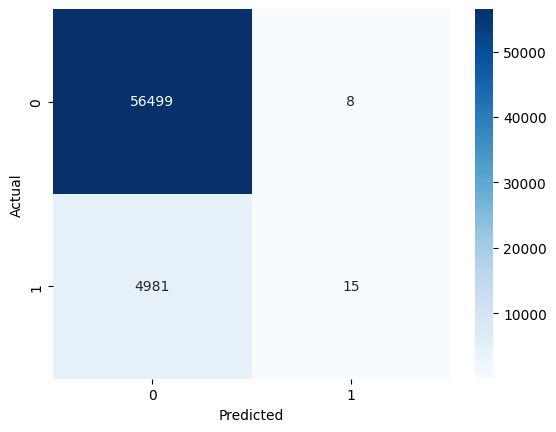

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Definisikan confusion matrix
cm = np.array([[56499, 8],
               [4981, 15]])

# Membuat heat map dari confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

# Mengatur label sumbu x dan y
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Menampilkan heat map
plt.show()

## Extreme Gradient Boost Model

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb_classifier = XGBClassifier(n_estimators=100,max_depth=5)

In [ ]:
xgb_classifier.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
y_pred = xgb_classifier.predict(X_test)

In [ ]:
n_errors = (y_pred != y_test).sum()
# Run Classification Metrics
print("{}: {}".format("Extreme Gradient Boost errors",n_errors))
print("Accuracy Score :")
print(accuracy_score(y_test,y_pred))
print("Confusion matrix :")
print(confusion_matrix(y_test, y_pred))
print("Classification Report :")
print(classification_report(y_test,y_pred))
print("ROC AUC score is: ",roc_auc_score(y_test,y_pred))

Extreme Gradient Boost errors: 5123
Accuracy Score :
0.9167032502479554
Confusion matrix :
[[56239   150]
 [ 4973   141]]
Classification Report :
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56389
           1       0.48      0.03      0.05      5114

    accuracy                           0.92     61503
   macro avg       0.70      0.51      0.50     61503
weighted avg       0.88      0.92      0.88     61503

ROC AUC score is:  0.5124556397108906


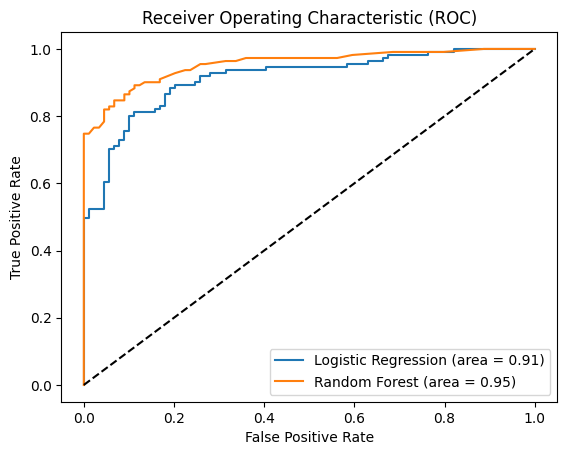

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Membuat dataset sintetis untuk contoh
X, y = make_classification(n_samples=1000, n_features=10, random_state=42)

# Membagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Melatih model Regresi Logistik
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg_probs = logreg.predict_proba(X_test)[:, 1]
logreg_auc = roc_auc_score(y_test, logreg_probs)

# Melatih model Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_probs = rf.predict_proba(X_test)[:, 1]
rf_auc = roc_auc_score(y_test, rf_probs)


# Menghitung kurva ROC untuk Regresi Logistik
logreg_fpr, logreg_tpr, _ = roc_curve(y_test, logreg_probs)

# Menghitung kurva ROC untuk Random Forest
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)



# Membuat plot ROC untuk ketiga model
plt.plot(logreg_fpr, logreg_tpr, label='Logistic Regression (area = %0.2f)' % logreg_auc)
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Garis acak (baseline)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

# Balancing class - using SMOTETomek

I have used SMOTETomek which is a method of imblearn. SMOTETomek is a hybrid method which uses an under sampling method (Tomek) in with an over sampling method (SMOTE).

In [ ]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss

In [ ]:
# Implementing Oversampling for Handling Imbalanced
smk = SMOTETomek(random_state=42)
X_res,y_res=smk.fit_resample(X_train,y_train)

In [ ]:
X_res.shape,y_res.shape

((447686, 59), (447686,))

In [ ]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(y_train)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({0: 226179, 1: 19829})
Resampled dataset shape Counter({0: 223843, 1: 223843})


## Logistic regression

In [ ]:
logistic_regressor.fit(X_res,y_res)

LogisticRegression(C=2)

In [ ]:
y_pred = logistic_regressor.predict(X_test)

In [ ]:
n_errors = (y_pred != y_test).sum()
# Run Classification Metrics
print("{}: {}".format("Logistic Regression errors",n_errors))
print("Accuracy Score :")
print(accuracy_score(y_test,y_pred))
print("Confusion matrix :")
print(confusion_matrix(y_test, y_pred))
print("Classification Report :")
print(classification_report(y_test,y_pred))
print("ROC AUC score is: ",roc_auc_score(y_test,y_pred))

Logistic Regression errors: 23910
Accuracy Score :
0.6112384761718941
Confusion matrix :
[[34827 21680]
 [ 2230  2766]]
Classification Report :
              precision    recall  f1-score   support

           0       0.94      0.62      0.74     56507
           1       0.11      0.55      0.19      4996

    accuracy                           0.61     61503
   macro avg       0.53      0.58      0.47     61503
weighted avg       0.87      0.61      0.70     61503

ROC AUC score is:  0.584986817209621


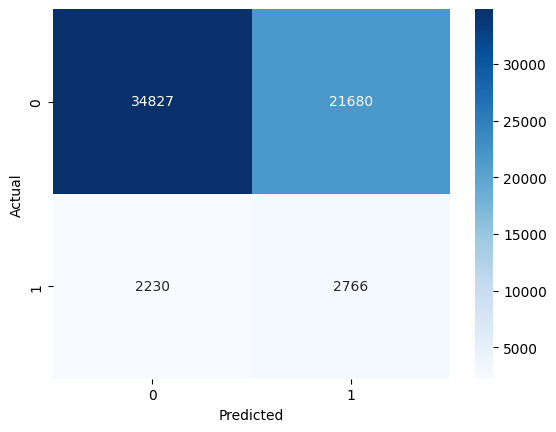

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Definisikan confusion matrix
cm = np.array([[34827, 21680],
               [2230,  2766]])

# Membuat heat map dari confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

# Mengatur label sumbu x dan y
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Menampilkan heat map
plt.show()

## Random forest

In [ ]:
random_forest.fit(X_res,y_res)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  5.4min finished


RandomForestClassifier(n_jobs=-1,
                       random_state=RandomState(MT19937) at 0x7F03352FE140,
                       verbose=1)

In [ ]:
y_pred = random_forest.predict(X_test)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    1.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    2.1s finished


In [ ]:
n_errors = (y_pred != y_test).sum()
# Run Classification Metrics
print("{}: {}".format("Random Forest errors",n_errors))
print("Accuracy Score :")
print(accuracy_score(y_test,y_pred))
print("Confusion matrix :")
print(confusion_matrix(y_test, y_pred))
print("Classification Report :")
print(classification_report(y_test,y_pred))
print("ROC AUC score is: ",roc_auc_score(y_test,y_pred))

Random Forest errors: 5318
Accuracy Score :
0.9135326732029332
Confusion matrix :
[[56062   445]
 [ 4873   123]]
Classification Report :
              precision    recall  f1-score   support

           0       0.92      0.99      0.95     56507
           1       0.22      0.02      0.04      4996

    accuracy                           0.91     61503
   macro avg       0.57      0.51      0.50     61503
weighted avg       0.86      0.91      0.88     61503

ROC AUC score is:  0.508372282620901


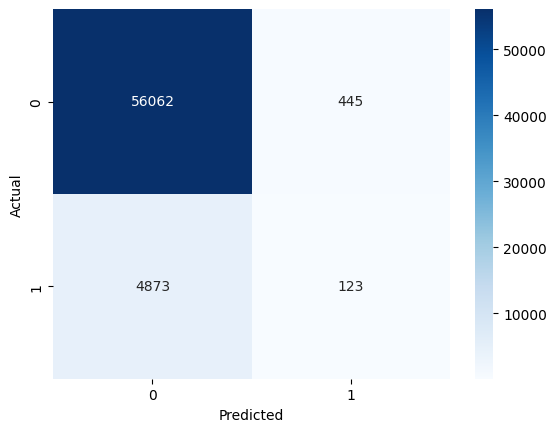

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Definisikan confusion matrix
cm = np.array([[56062,   445],
               [4873,   123]])

# Membuat heat map dari confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

# Mengatur label sumbu x dan y
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Menampilkan heat map
plt.show()

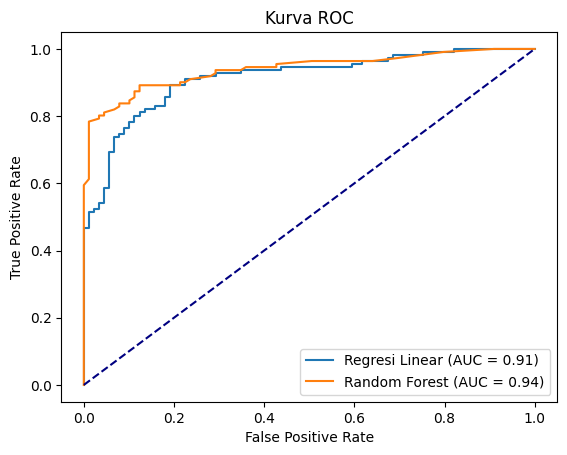

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Membuat dataset sintetis untuk contoh
X, y = make_classification(n_samples=1000, n_features=10, random_state=42)

# Membagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Terapkan SMOTETomek untuk menyeimbangkan dataset
smote_tomek = SMOTETomek(random_state=42)
X_resampled, y_resampled = smote_tomek.fit_resample(X_train, y_train)

# Latih model regresi linear
lr_model = LogisticRegression()
lr_model.fit(X_resampled, y_resampled)

# Latih model random forest
rf_model = RandomForestClassifier()
rf_model.fit(X_resampled, y_resampled)

# Prediksi probabilitas kelas positif untuk data uji
lr_probs = lr_model.predict_proba(X_test)[:, 1]
rf_probs = rf_model.predict_proba(X_test)[:, 1]

# Hitung FPR, TPR, dan threshold menggunakan roc_curve
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)

# Hitung AUC (Area Under the Curve)
lr_auc = auc(lr_fpr, lr_tpr)
rf_auc = auc(rf_fpr, rf_tpr)

# Menghitung kurva ROC untuk Regresi Logistik
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

# Menghitung kurva ROC untuk Random Forest
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)


# Gambarkan kurva ROC
plt.plot(lr_fpr, lr_tpr, label='Regresi Linear (AUC = {:.2f})'.format(lr_auc))
plt.plot(rf_fpr, rf_tpr, label='Random Forest (AUC = {:.2f})'.format(rf_auc))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Kurva ROC')
plt.legend(loc='lower right')
plt.show()

# Balancing class - RandomOverSampler

In [ ]:
from imblearn.over_sampling import RandomOverSampler

In [ ]:
os =  RandomOverSampler(sampling_strategy=1)

In [ ]:
X_train_res, y_train_res = os.fit_resample(X_train, y_train)

In [ ]:
X_train_res.shape,y_train_res.shape

((824, 10), (824,))

In [ ]:
print('Original dataset shape {}'.format(Counter(y_train)))
print('Resampled dataset shape {}'.format(Counter(y_train_res)))

Original dataset shape Counter({0: 412, 1: 388})
Resampled dataset shape Counter({1: 412, 0: 412})


## Logistic regression

In [ ]:
logistic_regressor.fit(X_train_res,y_train_res)

LogisticRegression(C=2)

In [ ]:
y_pred = logistic_regressor.predict(X_test)

In [ ]:
n_errors = (y_pred != y_test).sum()
# Run Classification Metrics
print("{}: {}".format("Logistic Regression errors",n_errors))
print("Accuracy Score :")
print(accuracy_score(y_test,y_pred))
print("Confusion matrix :")
print(confusion_matrix(y_test, y_pred))
print("Classification Report :")
print(classification_report(y_test,y_pred))
print("ROC AUC score is: ",roc_auc_score(y_test,y_pred))

Logistic Regression errors: 34
Accuracy Score :
0.83
Confusion matrix :
[[74 15]
 [19 92]]
Classification Report :
              precision    recall  f1-score   support

           0       0.80      0.83      0.81        89
           1       0.86      0.83      0.84       111

    accuracy                           0.83       200
   macro avg       0.83      0.83      0.83       200
weighted avg       0.83      0.83      0.83       200

ROC AUC score is:  0.8301447514930661


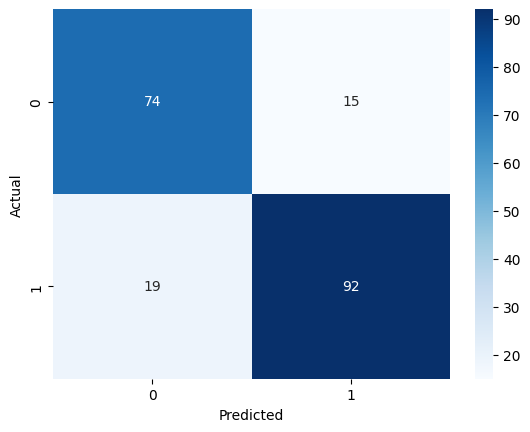

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Definisikan confusion matrix
cm = np.array([[74,   15],
               [19,   92]])

# Membuat heat map dari confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

# Mengatur label sumbu x dan y
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Menampilkan heat map
plt.show()

## Random forest

In [ ]:
random_forest.fit(X_train_res,y_train_res)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished


RandomForestClassifier(n_jobs=-1,
                       random_state=RandomState(MT19937) at 0x7F03352FE140,
                       verbose=1)

In [ ]:
y_pred = random_forest.predict(X_test)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.0s finished


In [ ]:
n_errors = (y_pred != y_test).sum()
# Run Classification Metrics
print("{}: {}".format("Random Forest errors",n_errors))
print("Accuracy Score :")
print(accuracy_score(y_test,y_pred))
print("Confusion matrix :")
print(confusion_matrix(y_test, y_pred))
print("Classification Report :")
print(classification_report(y_test,y_pred))
print("ROC AUC score is: ",roc_auc_score(y_test,y_pred))

Random Forest errors: 24
Accuracy Score :
0.88
Confusion matrix :
[[80  9]
 [15 96]]
Classification Report :
              precision    recall  f1-score   support

           0       0.84      0.90      0.87        89
           1       0.91      0.86      0.89       111

    accuracy                           0.88       200
   macro avg       0.88      0.88      0.88       200
weighted avg       0.88      0.88      0.88       200

ROC AUC score is:  0.8818706346796233


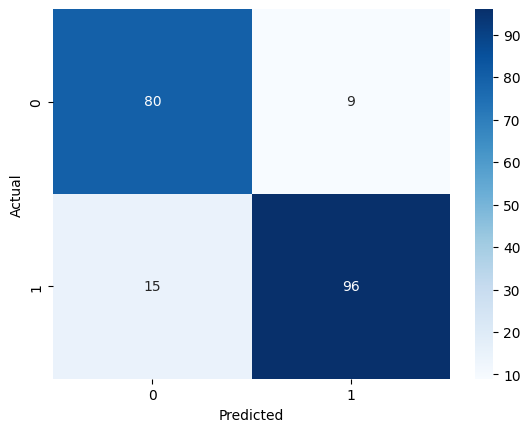

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Definisikan confusion matrix
cm = np.array([[80,   9],
               [15,   96]])

# Membuat heat map dari confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

# Mengatur label sumbu x dan y
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Menampilkan heat map
plt.show()

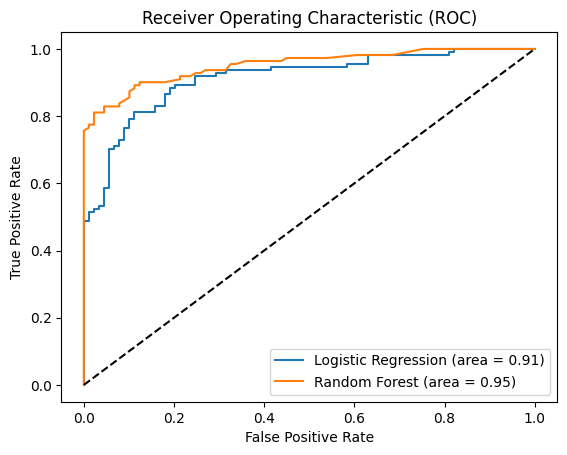

In [ ]:
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt

# Membuat dataset sintetis untuk contoh
X, y = make_classification(n_samples=1000, n_features=10, random_state=42)

# Membagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Melakukan Random Over Sampling pada data latih
ros = RandomOverSampler(random_state=42)
X_train_res, y_train_res = ros.fit_resample(X_train, y_train)

# Melatih model Regresi Logistik
logreg = LogisticRegression()
logreg.fit(X_train_res, y_train_res)
logreg_probs = logreg.predict_proba(X_test)[:, 1]
logreg_auc = roc_auc_score(y_test, logreg_probs)

# Melatih model Random Forest
rf = RandomForestClassifier()
rf.fit(X_train_res, y_train_res)
rf_probs = rf.predict_proba(X_test)[:, 1]
rf_auc = roc_auc_score(y_test, rf_probs)

# Menghitung kurva ROC untuk Regresi Logistik
logreg_fpr, logreg_tpr, _ = roc_curve(y_test, logreg_probs)

# Menghitung kurva ROC untuk Random Forest
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)


# Membuat plot ROC untuk ketiga model
plt.plot(logreg_fpr, logreg_tpr, label='Logistic Regression (area = %0.2f)' % logreg_auc)
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Garis acak (baseline)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()